In [10]:
import pandas as pd
import seaborn as sns

In [2]:
objects = pd.read_csv('fixed_dataset/objects.csv')
print(objects.info())

/var/folders/p2/skh823fd5t5fcl9_fbmxvw24rb6_10/T/ipykernel_60965/953361758.py:1: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv('fixed_dataset/objects.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462647 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

## Get Companies

In [4]:
companies = objects[
    (objects['entity_type'] == 'Company')
]
companies = companies[~(
   companies['category_code'].isnull() |
   companies['country_code'].isnull() | 
   companies['founded_at'].isnull()
)]
companies['founded_at_year'] = pd.to_datetime(companies['founded_at']).apply(lambda x: x.year)



companies.head()


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,founded_at_year
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,2005
5,c:10002,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,...,0,0.0,NaN,NaN,0,2,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,2007
6,c:10003,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,...,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,2008
12,c:10009,Company,10009,NaN,dimension5 labs,dimension5 labs,/company/dimension5-labs,advertising,operating,2008-08-01,...,0,0.0,2008-08-22,2008-08-22,1,2,NaN,2008-08-24 21:54:55,2008-12-21 17:21:53,2008
13,c:1001,Company,1001,NaN,FriendFeed,friendfeed,/company/friendfeed,web,acquired,2007-10-01,...,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,2007-10-01 10:17:13,2013-03-13 21:44:15,2007


## Get funding rounds after 2000

In [27]:
funding_rounds = pd.read_csv('fixed_dataset/funding_rounds.csv')
funding_rounds = funding_rounds[~funding_rounds['funded_at'].isna() & ~funding_rounds['object_id'].isna()]
funding_rounds.reset_index(inplace=True)
funding_rounds['funded_at_year'] = pd.to_datetime(funding_rounds['funded_at']).apply(lambda x: int(x.year))
print(funding_rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52382 entries, 0 to 52381
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     52382 non-null  int64  
 1   id                        52382 non-null  int64  
 2   funding_round_id          52382 non-null  int64  
 3   object_id                 52382 non-null  object 
 4   funded_at                 52382 non-null  object 
 5   funding_round_type        52382 non-null  object 
 6   funding_round_code        52382 non-null  object 
 7   raised_amount_usd         52382 non-null  float64
 8   raised_amount             52382 non-null  float64
 9   raised_currency_code      49492 non-null  object 
 10  pre_money_valuation_usd   52382 non-null  float64
 11  pre_money_valuation       52382 non-null  float64
 12  pre_money_currency_code   26813 non-null  object 
 13  post_money_valuation_usd  52382 non-null  float64
 14  post_m

In [30]:
funding_rounds_after_2000 = funding_rounds[funding_rounds['funded_at_year'] > 2000].copy()
funding_rounds_after_2000['raised_amount_mln_usd'] = funding_rounds_after_2000['raised_amount_usd'].apply(lambda x: round(x / 1e6, 2))

In [32]:
funding_rounds_after_2000['raised_amount_mln_usd'].head()

0     8.5
1     0.5
2    12.7
3    27.5
4    10.5
Name: raised_amount_mln_usd, dtype: float64

### Number of companies founded from 2000 by categories

In [7]:
companies_after_2000 = companies[companies['founded_at_year'] > 2000]
print(companies_after_2000.info())

<class 'pandas.core.frame.DataFrame'>
Index: 53265 entries, 0 to 196552
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   53265 non-null  object 
 1   entity_type          53265 non-null  object 
 2   entity_id            53265 non-null  int64  
 3   parent_id            0 non-null      object 
 4   name                 53265 non-null  object 
 5   normalized_name      53265 non-null  object 
 6   permalink            53265 non-null  object 
 7   category_code        53265 non-null  object 
 8   status               53265 non-null  object 
 9   founded_at           53265 non-null  object 
 10  closed_at            1535 non-null   object 
 11  domain               52492 non-null  object 
 12  homepage_url         52492 non-null  object 
 13  twitter_username     39929 non-null  object 
 14  logo_url             48815 non-null  object 
 15  logo_width           53265 non-null  int

In [14]:
top_categories = ['software', 'web', 'ecommerce', 'mobile', 'advertising']

In [12]:
companies_after_2000_by_category = companies_after_2000.groupby(by=['category_code', 'founded_at_year'], as_index=False)['id'].nunique()
companies_after_2000_by_category['cnt_companies'] = companies_after_2000_by_category['id']
companies_after_2000_by_category.head()

,category_code,founded_at_year,id,cnt_companies
0,advertising,2001,95,95
1,advertising,2002,69,69
2,advertising,2003,117,117
3,advertising,2004,112,112
4,advertising,2005,152,152


In [15]:
companies_after_2000_by_top_category = companies_after_2000_by_category[companies_after_2000_by_category['category_code'].isin(top_categories)]

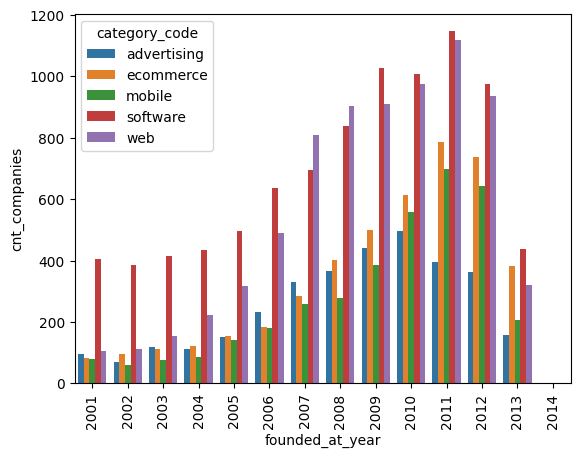

In [19]:
p = sns.barplot(x='founded_at_year', y='cnt_companies', data=companies_after_2000_by_top_category, hue='category_code')
for item in p.get_xticklabels():
    item.set_rotation(90)


### Scatter plot of the relation between the biggest amont of funds between the time period from the founding of the company to the date of the round

In [34]:
max_raised_amount = funding_rounds_after_2000.groupby('object_id').apply(lambda x: x.loc[x['raised_amount_mln_usd'].idxmax()])
max_raised_amount = max_raised_amount[['object_id', 'raised_amount_mln_usd', 'funded_at_year']]
max_raised_amount.reset_index(drop=True, inplace=True)
max_raised_amount.head()


/var/folders/p2/skh823fd5t5fcl9_fbmxvw24rb6_10/T/ipykernel_60965/3647154297.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_raised_amount = funding_rounds_after_2000.groupby('object_id').apply(lambda x: x.loc[x['raised_amount_mln_usd'].idxmax()])


,object_id,raised_amount_mln_usd,funded_at_year
0,c:1,25.0,2008
1,c:1001,5.0,2008
2,c:10014,0.0,2008
3,c:10015,43.0,2013
4,c:100155,6.5,2011


In [37]:
max_raised_amount_by_company = pd.merge(left=companies, right=max_raised_amount, left_on='id', right_on='object_id')
print(max_raised_amount_by_company.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22674 entries, 0 to 22673
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22674 non-null  object 
 1   entity_type            22674 non-null  object 
 2   entity_id              22674 non-null  int64  
 3   parent_id              0 non-null      object 
 4   name                   22674 non-null  object 
 5   normalized_name        22674 non-null  object 
 6   permalink              22674 non-null  object 
 7   category_code          22674 non-null  object 
 8   status                 22674 non-null  object 
 9   founded_at             22674 non-null  object 
 10  closed_at              1345 non-null   object 
 11  domain                 22042 non-null  object 
 12  homepage_url           22042 non-null  object 
 13  twitter_username       15930 non-null  object 
 14  logo_url               21483 non-null  object 
 15  lo

In [38]:
max_raised_amount_by_company['time_gap'] = max_raised_amount_by_company['funded_at_year'] - max_raised_amount_by_company['founded_at_year']
max_raised_amount_by_company = max_raised_amount_by_company[['object_id', 'raised_amount_mln_usd', 'funded_at_year', 'founded_at_year', 'time_gap']]
max_raised_amount_by_company.head()

,object_id,raised_amount_mln_usd,funded_at_year,founded_at_year,time_gap
0,c:1,25.0,2008,2005,3
1,c:1001,5.0,2008,2007,1
2,c:10014,0.0,2008,2008,0
3,c:10015,43.0,2013,2007,6
4,c:100155,6.5,2011,2003,8


Text(0.5, 0, 'time gap between founding and biggest round')

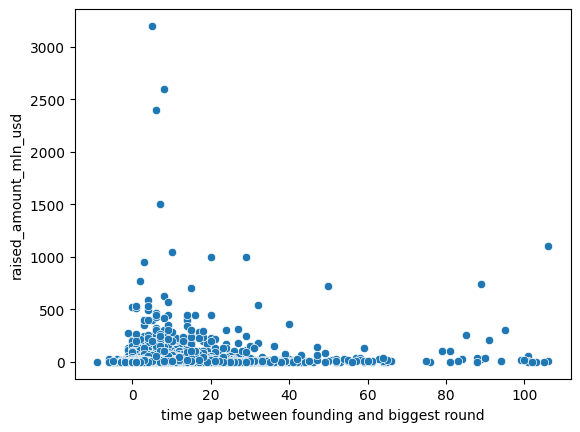

In [40]:
p = sns.scatterplot(data=max_raised_amount_by_company, x='time_gap', y='raised_amount_mln_usd')
p.set_xlabel('time gap between founding and biggest round')